In [9]:
import torch
from circuits import Circuit,Kinds
from learn import Trainer
from data import Data

In [10]:
# Get cpu or gpu device for training.
# device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"
print(f"Using {device} device")

# torch.autograd.set_detect_anomaly(True)
torch.set_printoptions(precision=13, linewidth=200)

Using cpu device


[(IVS, 2, 0), (R, 1, 0), (R, 2, 1)]


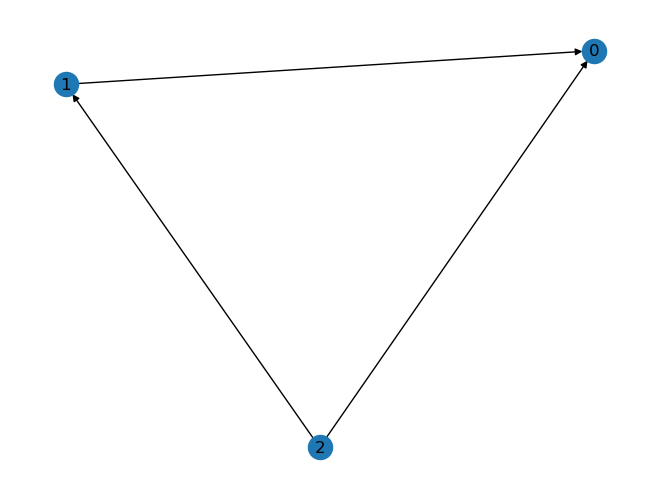

In [11]:
c = Circuit()
c.ring(Kinds.IVS,Kinds.R,2)
c.elements[0].attr = 1
c.elements[2].v = 1e-12
print(c.elements)
c.draw()

In [12]:
data = Data(c)
trainer = Trainer(data, 1e-1)

In [13]:
stable_threshold = 1e-5
loss_threshold = 1e-20
i_sol,v_sol,a_sol,loss,epoch = trainer.run(1000, stable_threshold, loss_threshold)
c.load(i_sol,v_sol,a_sol)
i_sol,v_sol,a_sol,epoch

threshold met
reset_count = 121


(tensor([-0.7877539992332,  0.7877539992332,  0.7877539992332]),
 tensor([1.0000000000000e+00, 1.0000000000000e+00, 9.9999999600420e-13]),
 tensor([1.0000000000000e+00, 1.2694318294525e+00, 1.2694318252821e-12], grad_fn=<IndexPutBackward0>),
 241)

In [14]:
c.elements[0].i, c.elements[0].v, c.elements[0].attr

(-0.7877539992332458, 1.0, 1.0)

In [15]:
c.elements[1].i, c.elements[1].v, c.elements[1].attr

(0.7877539992332458, 1.0, 1.2694318294525146)

In [16]:
c.elements[2].i, c.elements[2].v, c.elements[2].attr

(0.7877539992332458, 9.999999960041972e-13, 1.2694318252820525e-12)